<a href="https://colab.research.google.com/github/OleksiiLozovyi/goit-ds-hw-13/blob/main/Hw13_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.8891 - loss: 0.3056 - val_accuracy: 0.8928 - val_loss: 0.2910
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 66ms/step - accuracy: 0.9014 - loss: 0.2673 - val_accuracy: 0.8932 - val_loss: 0.2933
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.9129 - loss: 0.2420 - val_accuracy: 0.8965 - val_loss: 0.2790
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.9198 - loss: 0.2199 - val_accuracy: 0.9078 - val_loss: 0.2535
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.9268 - loss: 0.1994 - val_accuracy: 0.9045 - val_loss: 0.2633
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 62ms/step - accuracy: 0.9360 - loss: 0.1801 - val_accuracy: 0.9108 - val_loss: 0.2487
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.9403 - loss: 0.1639 - val_accuracy: 0.9087 - val_loss: 0.2610
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.9466 - loss: 0.1440 - 

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 3s - 10ms/step - accuracy: 0.9090 - loss: 0.4272
Test accuracy: 0.9089999794960022


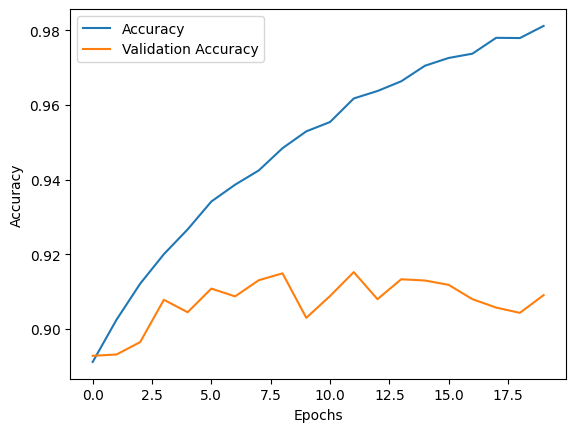

In [15]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

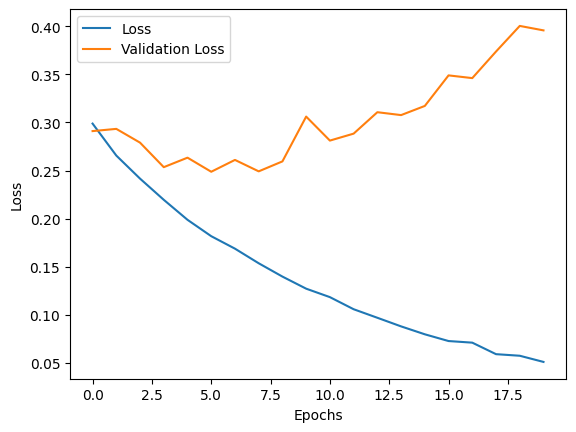

In [16]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
print("Згорткова нейромережа досягла точності, яка зазвичай перевищує багатошарову нейромережу за рахунок врахування локальних ознак зображень.")

Згорткова нейромережа досягла точності, яка зазвичай перевищує багатошарову нейромережу за рахунок врахування локальних ознак зображень.
